# POOL BASED SAMPLING

Importation des bibliothèques necessaireset du dataset

In [3]:
import numpy as np
import pandas as pd
import np_utils
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
from fast_ml.model_development import train_valid_test_split

In [4]:
df=pd.read_table('./Dataset.txt',sep=',',header=None)
df

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,0.00,0.09,0.00,0.00,0.00,0.08,0.00,0.00,0.09,0.04,...,25,63,27,29,1,4,8,0.52,0,AiinI
1,0.06,0.12,0.00,0.00,0.04,0.06,0.00,0.00,0.08,0.00,...,18,71,43,28,1,5,9,0.53,0,AiinI
2,0.02,0.06,0.00,0.00,0.04,0.06,0.00,0.00,0.09,0.00,...,36,91,58,23,1,5,8,0.52,0,AiinI
3,0.00,0.05,0.08,0.00,0.03,0.09,0.02,0.00,0.12,0.00,...,31,67,37,19,1,5,7,0.52,0,AiinI
4,0.08,0.07,0.00,0.00,0.05,0.06,0.00,0.00,0.13,0.00,...,34,70,49,18,1,4,9,0.53,0,AiinI
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5595,0.00,0.00,0.02,0.00,0.00,0.00,0.00,0.10,0.00,0.00,...,29,48,12,20,2,3,5,0.52,0,ZadI
5596,0.00,0.00,0.00,0.03,0.00,0.00,0.00,0.05,0.00,0.00,...,21,82,6,37,2,5,5,0.53,0,ZadI
5597,0.00,0.00,0.04,0.00,0.00,0.00,0.00,0.04,0.00,0.00,...,26,46,3,13,2,5,4,0.52,0,ZadI
5598,0.00,0.05,0.00,0.00,0.00,0.00,0.00,0.08,0.00,0.00,...,24,45,2,17,2,3,5,0.55,0,ZadI


In [5]:
# Rename correct label column name to label
df.rename(columns={31:'label'}, inplace=True)
df

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,label
0,0.00,0.09,0.00,0.00,0.00,0.08,0.00,0.00,0.09,0.04,...,25,63,27,29,1,4,8,0.52,0,AiinI
1,0.06,0.12,0.00,0.00,0.04,0.06,0.00,0.00,0.08,0.00,...,18,71,43,28,1,5,9,0.53,0,AiinI
2,0.02,0.06,0.00,0.00,0.04,0.06,0.00,0.00,0.09,0.00,...,36,91,58,23,1,5,8,0.52,0,AiinI
3,0.00,0.05,0.08,0.00,0.03,0.09,0.02,0.00,0.12,0.00,...,31,67,37,19,1,5,7,0.52,0,AiinI
4,0.08,0.07,0.00,0.00,0.05,0.06,0.00,0.00,0.13,0.00,...,34,70,49,18,1,4,9,0.53,0,AiinI
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5595,0.00,0.00,0.02,0.00,0.00,0.00,0.00,0.10,0.00,0.00,...,29,48,12,20,2,3,5,0.52,0,ZadI
5596,0.00,0.00,0.00,0.03,0.00,0.00,0.00,0.05,0.00,0.00,...,21,82,6,37,2,5,5,0.53,0,ZadI
5597,0.00,0.00,0.04,0.00,0.00,0.00,0.00,0.04,0.00,0.00,...,26,46,3,13,2,5,4,0.52,0,ZadI
5598,0.00,0.05,0.00,0.00,0.00,0.00,0.00,0.08,0.00,0.00,...,24,45,2,17,2,3,5,0.55,0,ZadI


### Splitting the data

Nous avons essayé une première fois de split les données de manières adéquate pour l'active learning

In [6]:
df2=df.copy()
df1 = pd.get_dummies(df['label'])
df2= pd.concat([df2, df1], axis=1).reindex(df2.index)
df2.drop('label', axis=1, inplace=True)
df2=df.sample(frac=1)
def load_data(df2):
 
    # Split data into X and Y for each type
    pool=df2.iloc[0:5040] #90% of the data is unlabeled
    remain=df2.iloc[5041:5599] # 10% of the data is labeled

    # Split data into train and test set valid and pool 
    x_train, y_train, x_valid, y_valid, x_test, y_test = train_valid_test_split(remain, target = 'label', 
                                                                            train_size=0.8, valid_size=0.1, test_size=0.1)
    # Convert into numpy array to ease preprocessing
    x_train = x_train.to_numpy()
    x_test = x_test.to_numpy()
    x_valid=x_valid.to_numpy()

    return x_train,y_train,x_test,y_test,x_valid,y_valid,pool

In [7]:
x_train,y_train,x_test,y_test,x_valid,y_valid,pool = load_data(df2)

## Lazy predict
Nous permet de savoir quel algorithme de classification convient le mieux à notre dataset

In [8]:
import lazypredict
from lazypredict.Supervised import LazyClassifier
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models,predictions = clf.fit(x_train, x_test, y_train, y_test)
models

100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:05<00:00,  5.76it/s]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
ExtraTreesClassifier,0.84,0.85,None,0.81,0.19
LinearDiscriminantAnalysis,0.86,0.84,None,0.85,0.44
GaussianNB,0.82,0.83,None,0.82,0.02
KNeighborsClassifier,0.80,0.82,None,0.77,0.47
RandomForestClassifier,0.82,0.82,None,0.79,0.28
PassiveAggressiveClassifier,0.80,0.82,None,0.79,0.05
SVC,0.79,0.81,None,0.75,0.05
LGBMClassifier,0.84,0.81,None,0.80,1.46
CalibratedClassifierCV,0.82,0.81,None,0.77,0.74


## Testing bagging algorithm

In [9]:
from sklearn import metrics
def get_accuracy(X_train, X_test, y_train, y_test, model):
    return  {"test Accuracy":metrics.accuracy_score(y_test, model.predict(X_test)),"train Accuracy": metrics.accuracy_score(y_train, model.predict(X_train))}

In [10]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
Bag = BaggingClassifier(base_estimator=DecisionTreeClassifier(criterion="entropy",
                                                              max_depth = 15,
                                                              random_state=2),
                        n_estimators=30,
                        random_state=0,
                        bootstrap=True)

In [11]:
Bag.fit(x_train,y_train)
Bag.predict(x_test)
print(get_accuracy(x_train, x_test, y_train, y_test,  Bag))

{'test Accuracy': 0.7857142857142857, 'train Accuracy': 1.0}


## Feature Engeneering PCA

In [12]:
# Set our RNG seed for reproducibility.
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
RANDOM_STATE_SEED = 42
np.random.seed(RANDOM_STATE_SEED)
from sklearn.decomposition import PCA
# copying dataset
df3=df.copy()
# Dropping Possible Outliers
q1=df3[1].quantile(0.25)
q3=df3[1].quantile(0.75)
iqr=q3-q1
df3=df3[~((df3[0]<(q1-1.5*iqr))| (df3[0]>(q3+1.5*iqr)))]
X= df3.iloc[:, 0:31].copy().to_numpy()
y=label_encoder.fit_transform(df3['label'])
# Define our PCA transformer and fit it onto our raw dataset.
pca = PCA(n_components=2, random_state=RANDOM_STATE_SEED)
transformed_df = pca.fit_transform(X=X)

In [13]:
y

array([ 0,  0,  0, ..., 27, 27, 27])

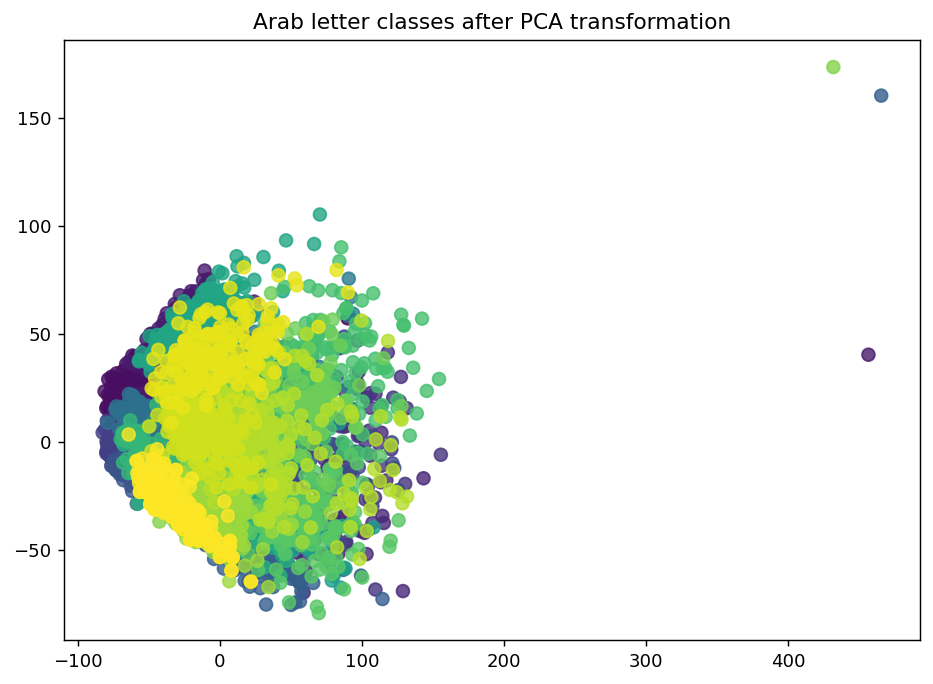

In [14]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

# Isolate the data we'll need for plotting.
x_component, y_component = transformed_df[:, 0], transformed_df[:, 1]

# Plot our dimensionality-reduced (via PCA) dataset.
plt.figure(figsize=(8.5, 6), dpi=130)
plt.scatter(x=x_component, y=y_component,c=y ,cmap='viridis', s=50, alpha=8/10)
plt.title('Arab letter classes after PCA transformation')
plt.show()

En regardant la distribution des points nous remarquons que les clusters formés par chaque classe sont très proches, meme si l'algorithme de Bagging c'est prouvé efficace plus haut, nous allons testé un autre algorithme qui semble correspondre mieux: 

Nous remarquons aussi la présence de 3 outlier que nous allons supprimer de X_component,y_component, X et y.

In [15]:
# Isolate our examples for our labeled dataset.
n_labeled_examples = X.shape[0]
training_indices = np.random.randint(low=0, high=n_labeled_examples + 1, size=3)

X_train = X[training_indices]
y_train = y[training_indices]

# Isolate the non-training examples we'll be querying.
X_pool = np.delete(X, training_indices, axis=0)
y_pool = np.delete(y, training_indices, axis=0)

## Active learning with pool-based sampling

In [16]:
from sklearn.neighbors import KNeighborsClassifier
from modAL.models import ActiveLearner

# Specify our core estimator along with it's active learning model.
bag=BaggingClassifier(base_estimator=DecisionTreeClassifier(criterion="entropy",
                                                              max_depth = 15,
                                                              random_state=2),
                        n_estimators=30,
                        random_state=0,
                        bootstrap=True)
learner = ActiveLearner(estimator=bag, X_training=X_train, y_training=y_train)

Initial training set

In [17]:
# Isolate the data we'll need for plotting.
predictions = learner.predict(X)
is_correct = (predictions == y)

predictions

array([27, 26, 27, ..., 27, 27, 27])

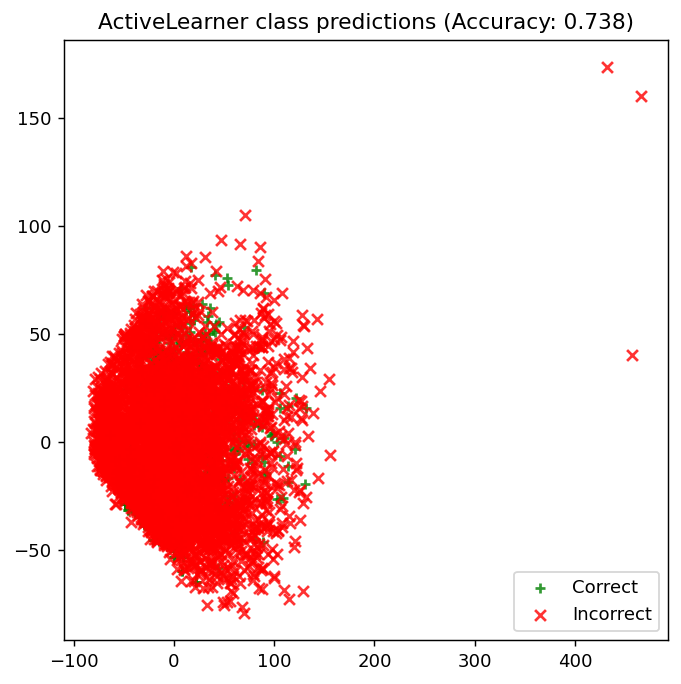

In [22]:
# Record our learner's score on the raw data.
unqueried_score = learner.score(X, y)

# Plot our classification results.
fig, ax = plt.subplots(figsize=(6, 6), dpi=130)
ax.scatter(x=x_component[is_correct],  y=y_component[is_correct],  c='g', marker='+', label='Correct',   alpha=8/10)
ax.scatter(x=x_component[~is_correct], y=y_component[~is_correct], c='r', marker='x', label='Incorrect', alpha=8/10)
ax.legend(loc='lower right')
ax.set_title("ActiveLearner class predictions (Accuracy: {score:.3f})".format(score=unqueried_score))
plt.show()


### Update our model by pool-based sampling our “unlabeled” dataset

In [23]:
N_QUERIES = 30
performance_history = [unqueried_score]

# Allow our model to query our unlabeled dataset for the most
# informative points according to our query strategy (uncertainty sampling).
for index in range(N_QUERIES):
    query_index, query_instance = learner.query(X_pool)

    # Teach our ActiveLearner model the record it has requested.
    X_raw, y_raw = X_pool[query_index].reshape(1, -1), y_pool[query_index].reshape(1, )
    learner.teach(X=X_raw, y=y_raw)

    # Remove the queried instance from the unlabeled pool.
    X_pool, y_pool = np.delete(X_pool, query_index, axis=0), np.delete(y_pool, query_index)

    # Calculate and report our model's accuracy.
    model_accuracy = learner.score(X, y)
    print('Accuracy after query {n}: {acc:0.4f}'.format(n=index + 1, acc=model_accuracy))

    # Save our model's performance for plotting.
    performance_history.append(model_accuracy)

Accuracy after query 1: 0.7476
Accuracy after query 2: 0.7494
Accuracy after query 3: 0.7529
Accuracy after query 4: 0.7503
Accuracy after query 5: 0.7422
Accuracy after query 6: 0.7516
Accuracy after query 7: 0.7529
Accuracy after query 8: 0.7536
Accuracy after query 9: 0.7562
Accuracy after query 10: 0.7520
Accuracy after query 11: 0.7522
Accuracy after query 12: 0.7522
Accuracy after query 13: 0.7571
Accuracy after query 14: 0.7534
Accuracy after query 15: 0.7494
Accuracy after query 16: 0.7463
Accuracy after query 17: 0.7479
Accuracy after query 18: 0.7533
Accuracy after query 19: 0.7606
Accuracy after query 20: 0.7639
Accuracy after query 21: 0.7689
Accuracy after query 22: 0.7726
Accuracy after query 23: 0.7720
Accuracy after query 24: 0.7676
Accuracy after query 25: 0.7750
Accuracy after query 26: 0.7718
Accuracy after query 27: 0.7638
Accuracy after query 28: 0.7691
Accuracy after query 29: 0.7676
Accuracy after query 30: 0.7687


### Evaluate our model’s performance

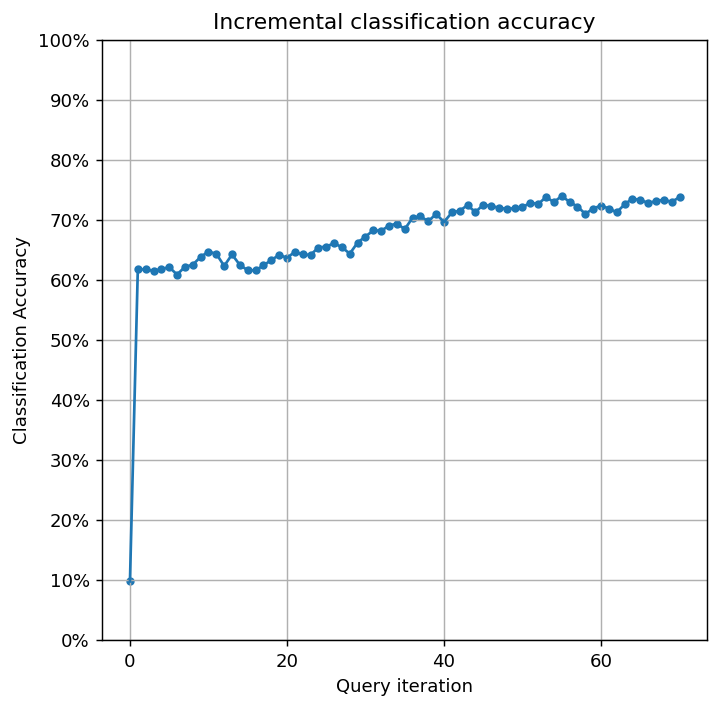

In [21]:
# Plot our performance over time.
fig, ax = plt.subplots(figsize=(6, 6), dpi=130)

ax.plot(performance_history)
ax.scatter(range(len(performance_history)), performance_history, s=13)

ax.xaxis.set_major_locator(mpl.ticker.MaxNLocator(nbins=5, integer=True))
ax.yaxis.set_major_locator(mpl.ticker.MaxNLocator(nbins=10))
ax.yaxis.set_major_formatter(mpl.ticker.PercentFormatter(xmax=1))

ax.set_ylim(bottom=0, top=1)
ax.grid(True)

ax.set_title('Incremental classification accuracy')
ax.set_xlabel('Query iteration')
ax.set_ylabel('Classification Accuracy')

plt.show()

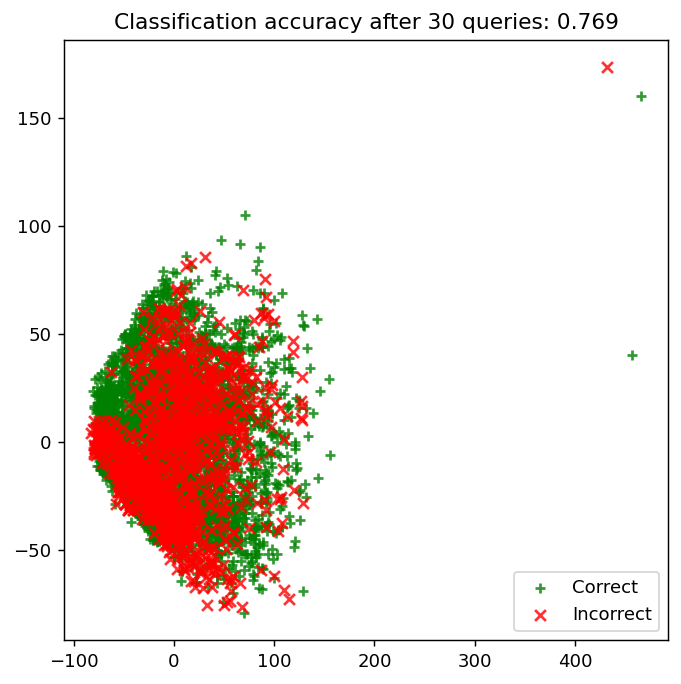

In [24]:
# Isolate the data we'll need for plotting.
predictions = learner.predict(X)
is_correct = (predictions == y)

# Plot our updated classification results once we've trained our learner.
fig, ax = plt.subplots(figsize=(6, 6), dpi=130)

ax.scatter(x=x_component[is_correct],  y=y_component[is_correct],  c='g', marker='+', label='Correct',   alpha=8/10)
ax.scatter(x=x_component[~is_correct], y=y_component[~is_correct], c='r', marker='x', label='Incorrect', alpha=8/10)

ax.set_title('Classification accuracy after {n} queries: {final_acc:.3f}'.format(n=N_QUERIES, final_acc=performance_history[-1]))
ax.legend(loc='lower right')

plt.show()
